In [1]:
import pyspark
from pyspark import SparkContext
from pyspark.sql import SQLContext


sc = SparkContext('local', 'Spark SQL1') 
sqlc = SQLContext(sc)

In [2]:
app = sqlc.read.csv('application_record.csv', header=True, inferSchema=True)

In [3]:
##getting the schema of the Application data
app.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- CODE_GENDER: string (nullable = true)
 |-- FLAG_OWN_CAR: string (nullable = true)
 |-- FLAG_OWN_REALTY: string (nullable = true)
 |-- CNT_CHILDREN: integer (nullable = true)
 |-- AMT_INCOME_TOTAL: double (nullable = true)
 |-- NAME_INCOME_TYPE: string (nullable = true)
 |-- NAME_EDUCATION_TYPE: string (nullable = true)
 |-- NAME_FAMILY_STATUS: string (nullable = true)
 |-- NAME_HOUSING_TYPE: string (nullable = true)
 |-- DAYS_BIRTH: integer (nullable = true)
 |-- DAYS_EMPLOYED: integer (nullable = true)
 |-- FLAG_MOBIL: integer (nullable = true)
 |-- FLAG_WORK_PHONE: integer (nullable = true)
 |-- FLAG_PHONE: integer (nullable = true)
 |-- FLAG_EMAIL: integer (nullable = true)
 |-- OCCUPATION_TYPE: string (nullable = true)
 |-- CNT_FAM_MEMBERS: double (nullable = true)



In [4]:
app.toPandas().head(3)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,None,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,None,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0


In [5]:
##Categorical and Continous Data Identification
app.columns

['ID',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS']

In [6]:
##Categorical 'CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY',
#'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',FLAG_MOBIL','FLAG_WORK_PHONE',
 #'FLAG_PHONE','FLAG_EMAIL','OCCUPATION_TYPE'
#Contiounous : 'CNT_CHILDREN','AMT_INCOME_TOTAL','DAYS_BIRTH','DAYS_EMPLOYED'

In [7]:
#Renaming the column of App Data
new_names = ['id', 'gender','own_car','own_reality','chldno','income','income_type','edu_type','fam_status','house_type',
            'days_birth','days_employed','mobile','work','phone','email','occu_type','fam_size']
app_df=app.toDF(*new_names)

In [8]:
app_df.columns

['id',
 'gender',
 'own_car',
 'own_reality',
 'chldno',
 'income',
 'income_type',
 'edu_type',
 'fam_status',
 'house_type',
 'days_birth',
 'days_employed',
 'mobile',
 'work',
 'phone',
 'email',
 'occu_type',
 'fam_size']

In [16]:
app_df.toPandas().head(2)

,id,gender,own_car,own_reality,chldno,income,income_type,edu_type,fam_status,house_type,days_birth,days_employed,mobile,work,phone,email,occu_type,fam_size
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,None,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,None,2.0


In [17]:
print(app_df.count(),len(app_df.columns))

438557 18


In [18]:
#total 438557 records

In [19]:
##Missing values in App data
##Checking missing values in merged dataframe
from pyspark.sql.functions import isnan, when, count, col

app_df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in app_df.columns]).toPandas().transpose()

,0
id,0
gender,0
own_car,0
own_reality,0
chldno,0
income,0
income_type,0
edu_type,0
fam_status,0
house_type,0


In [20]:
##occupation_type is missing a lot we need to treat them seperately
# Registering a table
app_df.registerTempTable("app_df")
sqlc.sql("select * from app_df where occu_type IS NULL").toPandas().head(6)

,id,gender,own_car,own_reality,chldno,income,income_type,edu_type,fam_status,house_type,days_birth,days_employed,mobile,work,phone,email,occu_type,fam_size
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,None,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,None,2.0
2,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,None,1.0
3,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,None,1.0
4,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,None,1.0
5,5008834,F,N,Y,1,112500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-10968,-1620,1,0,0,0,None,2.0


In [21]:
##Checking the dataframe summary
app_df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
id,438557,6022176.269841776,571637.0232571138,5008804,7999952
gender,438557,None,None,F,M
own_car,438557,None,None,N,Y
own_reality,438557,None,None,N,Y
chldno,438557,0.42739028222101116,0.7248822135521471,0,19
income,438557,187524.28600950394,110086.85306622818,26100.0,6750000.0
income_type,438557,None,None,Commercial associate,Working
edu_type,438557,None,None,Academic degree,Secondary / secondary special
fam_status,438557,None,None,Civil marriage,Widow


#### Outliers is in Chldno columns where the max is 19 and Mean 0.4
#### Income having outlier mean and Max
#### fam_size has some outliers mean is 2 and max is 20
#### days_employed and days_birth are in - we have to calculate those in years and make them absolute


In [22]:
##Checking duplicate records
app_df.select("id").distinct().count()

438510

In [23]:
print("Duplicate records in App data",app_df.count()-app_df.select("id").distinct().count())

Duplicate records in App data 47


In [24]:
##Duplicates can be removed
app_dis=app_df.dropDuplicates(['id'])

In [25]:
app_dis.count()

438510

In [26]:
##Transforming Days of Birth and days_employed to years to get more insights
def convert_daystoyears(x):
 years=0
 if x!=0:
  years =abs((int) (x/ 365))
 return years 

In [27]:
##regitering this as UDF
from pyspark.sql.functions import udf
from pyspark.sql import Row
from pyspark.sql.types import IntegerType
calculate_years = udf(lambda z: convert_daystoyears(z), IntegerType())
sqlc.udf.register("calculate_years", calculate_years)

<function __main__.<lambda>(z)>

In [28]:
app_agec = app_dis.withColumn( 'age',calculate_years('days_birth')).withColumn( 'employed_years',calculate_years('days_employed'))

In [29]:
app_agec.columns

['id',
 'gender',
 'own_car',
 'own_reality',
 'chldno',
 'income',
 'income_type',
 'edu_type',
 'fam_status',
 'house_type',
 'days_birth',
 'days_employed',
 'mobile',
 'work',
 'phone',
 'email',
 'occu_type',
 'fam_size',
 'age',
 'employed_years']

In [30]:
app_agec.toPandas().head(3)

,id,gender,own_car,own_reality,chldno,income,income_type,edu_type,fam_status,house_type,days_birth,days_employed,mobile,work,phone,email,occu_type,fam_size,age,employed_years
0,5009033,F,N,N,0,255150.0,Pensioner,Incomplete higher,Civil marriage,Rented apartment,-18682,365243,1,0,0,0,None,2.0,51,1000
1,5009304,F,N,N,0,112500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-22061,365243,1,0,0,0,None,1.0,60,1000
2,5009355,F,N,N,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19692,-5273,1,1,1,0,Laborers,2.0,53,14


In [31]:
##Dropping the original column
columns_todrop=["days_birth","days_employed"]
app_g6 = app_agec.drop(*columns_todrop)

In [32]:
app_g6.columns

['id',
 'gender',
 'own_car',
 'own_reality',
 'chldno',
 'income',
 'income_type',
 'edu_type',
 'fam_status',
 'house_type',
 'mobile',
 'work',
 'phone',
 'email',
 'occu_type',
 'fam_size',
 'age',
 'employed_years']

In [33]:
##Credit Report Data
credit=sqlc.read.csv('credit_record.csv',header=True,inferSchema=True)
credit.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- MONTHS_BALANCE: integer (nullable = true)
 |-- STATUS: string (nullable = true)



In [34]:
##Summary
credit.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
ID,1048575,5068286.424673486,46150.5785053759,5001711,5150487
MONTHS_BALANCE,1048575,-19.136998307226474,14.023497688326643,-60,0
STATUS,1048575,0.05824863961501482,0.3949878642052496,0,X


In [35]:
##Months Balance is in -Ve and has some outliers
##Status is the outcome column


In [36]:
##renaming columns
rename_cols=["id","mon_bal","label"]
credit_df=credit.toDF(*rename_cols)

In [37]:
credit_df.columns

['id', 'mon_bal', 'label']

In [38]:
##Checking duplicates in Credit
credit_df.select("id").distinct().count()

45985

In [39]:
credit_df.count()

1048575

In [40]:
##too many duplicates due to the months balance
credit_df.groupby('label').count().toPandas()

,label,count
0,3,320
1,0,383120
2,5,1693
3,C,442031
4,X,209230
5,1,11090
6,4,223
7,2,868


In [41]:
##removing duplicates
credit_dis=credit_df.dropDuplicates(['id'])

In [42]:
credit_dis.count()

45985

In [43]:
credit_dis.groupby('label').count().toPandas()

,label,count
0,3,6
1,0,10547
2,5,82
3,C,22707
4,X,12266
5,1,353
6,4,5
7,2,19


In [44]:
##Changing months balance to absolute value
from pyspark.sql.functions import abs
cred=credit_dis.withColumn("months_bal",abs(credit_dis.mon_bal)).drop('mon_bal')

In [45]:
cred.toPandas().head(3)

,id,label,months_bal
0,5001812,0,0
1,5001849,C,0
2,5001921,C,0


In [46]:
cred.filter(cred.months_bal < 0).show()

+---+-----+----------+
| id|label|months_bal|
+---+-----+----------+
+---+-----+----------+



In [47]:
##Merging 2 datsets Application and Credit for doing analysis
#renaming the id column
credit_df1=cred.withColumnRenamed("id","id_cred")

In [48]:
credit_df1.columns

['id_cred', 'label', 'months_bal']

In [49]:
merge_df=app_g6.join(credit_df1,app_g6.id == credit_df1.id_cred,"left").drop('id_cred')

In [50]:
merge_df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- own_car: string (nullable = true)
 |-- own_reality: string (nullable = true)
 |-- chldno: integer (nullable = true)
 |-- income: double (nullable = true)
 |-- income_type: string (nullable = true)
 |-- edu_type: string (nullable = true)
 |-- fam_status: string (nullable = true)
 |-- house_type: string (nullable = true)
 |-- mobile: integer (nullable = true)
 |-- work: integer (nullable = true)
 |-- phone: integer (nullable = true)
 |-- email: integer (nullable = true)
 |-- occu_type: string (nullable = true)
 |-- fam_size: double (nullable = true)
 |-- age: integer (nullable = true)
 |-- employed_years: integer (nullable = true)
 |-- label: string (nullable = true)
 |-- months_bal: integer (nullable = true)



In [51]:
merge_df.groupby("label").count().show()

+-----+------+
|label| count|
+-----+------+
|    3|     6|
|    0|  8456|
| null|402053|
|    5|    76|
|    C| 17950|
|    X|  9669|
|    1|   276|
|    4|     5|
|    2|    19|
+-----+------+



In [52]:
##Totally 402053 records are misssing we need to drop them as they are not useful
clean_df=merge_df.filter(merge_df.label.isNotNull())

In [53]:
clean_df.toPandas().head(2)

,id,gender,own_car,own_reality,chldno,income,income_type,edu_type,fam_status,house_type,mobile,work,phone,email,occu_type,fam_size,age,employed_years,label,months_bal
0,5009033,F,N,N,0,255150.0,Pensioner,Incomplete higher,Civil marriage,Rented apartment,1,0,0,0,None,2.0,51,1000,X,0
1,5009304,F,N,N,0,112500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,1,0,0,0,None,1.0,60,1000,C,0


In [54]:
clean_df.groupby("label").count().show()

+-----+-----+
|label|count|
+-----+-----+
|    3|    6|
|    0| 8456|
|    5|   76|
|    C|17950|
|    X| 9669|
|    1|  276|
|    4|    5|
|    2|   19|
+-----+-----+



In [55]:
print("The total count of dataset",clean_df.count())

The total count of dataset 36457


In [56]:
##Tagging the Deliquent customer based on the condition
##Non Deliquent Customer when the status 0,1,c and X and Deliquent is 2,3,4,5
model_data=clean_df.withColumn("outcome",when(clean_df["label"].isin({"0", "1","C","X"}),0).otherwise(1)).drop("label")

In [57]:
model_data.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- own_car: string (nullable = true)
 |-- own_reality: string (nullable = true)
 |-- chldno: integer (nullable = true)
 |-- income: double (nullable = true)
 |-- income_type: string (nullable = true)
 |-- edu_type: string (nullable = true)
 |-- fam_status: string (nullable = true)
 |-- house_type: string (nullable = true)
 |-- mobile: integer (nullable = true)
 |-- work: integer (nullable = true)
 |-- phone: integer (nullable = true)
 |-- email: integer (nullable = true)
 |-- occu_type: string (nullable = true)
 |-- fam_size: double (nullable = true)
 |-- age: integer (nullable = true)
 |-- employed_years: integer (nullable = true)
 |-- months_bal: integer (nullable = true)
 |-- outcome: integer (nullable = false)



In [58]:
model_data.toPandas().head(3)

,id,gender,own_car,own_reality,chldno,income,income_type,edu_type,fam_status,house_type,mobile,work,phone,email,occu_type,fam_size,age,employed_years,months_bal,outcome
0,5009033,F,N,N,0,255150.0,Pensioner,Incomplete higher,Civil marriage,Rented apartment,1,0,0,0,None,2.0,51,1000,0,0
1,5009304,F,N,N,0,112500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,1,0,0,0,None,1.0,60,1000,0,0
2,5009355,F,N,N,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,1,1,0,Laborers,2.0,53,14,0,0


In [59]:
model_data.groupby('outcome').count().show()

+-------+-----+
|outcome|count|
+-------+-----+
|      1|  106|
|      0|36351|
+-------+-----+



In [60]:
##This is too Imbalanced data we need to consider this while fitting the model

## Exploratory Data Analysis on the features

In [61]:
##Gender data
model_data.groupby("gender").count().show()

+------+-----+
|gender|count|
+------+-----+
|     F|24430|
|     M|12027|
+------+-----+



In [62]:
model_data.groupby("gender","outcome").count().show()

+------+-------+-----+
|gender|outcome|count|
+------+-------+-----+
|     M|      1|   45|
|     F|      0|24369|
|     F|      1|   61|
|     M|      0|11982|
+------+-------+-----+



#### Male applicants are more deliquent than female by 0.001 %

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [64]:
model_pd=model_data.toPandas()

<AxesSubplot:>

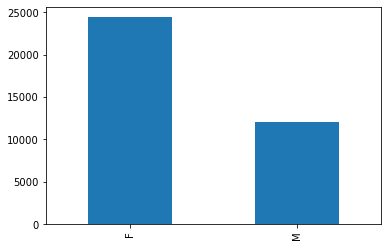

In [65]:
model_pd["gender"].value_counts().plot(kind="bar")

In [66]:
## 1. What is the proportion of females in the applicant customer base?
female_applicants=model_data.filter(model_data["gender"] == 'F').count()
female_applicants

24430

In [67]:
print("Female Applicants Proportion",(female_applicants/model_data.count())*100)

Female Applicants Proportion 67.01045066791013


#### Mostly 67% of the applicants are female

In [68]:
model_pd.to_csv('CreditcardApp.csv')

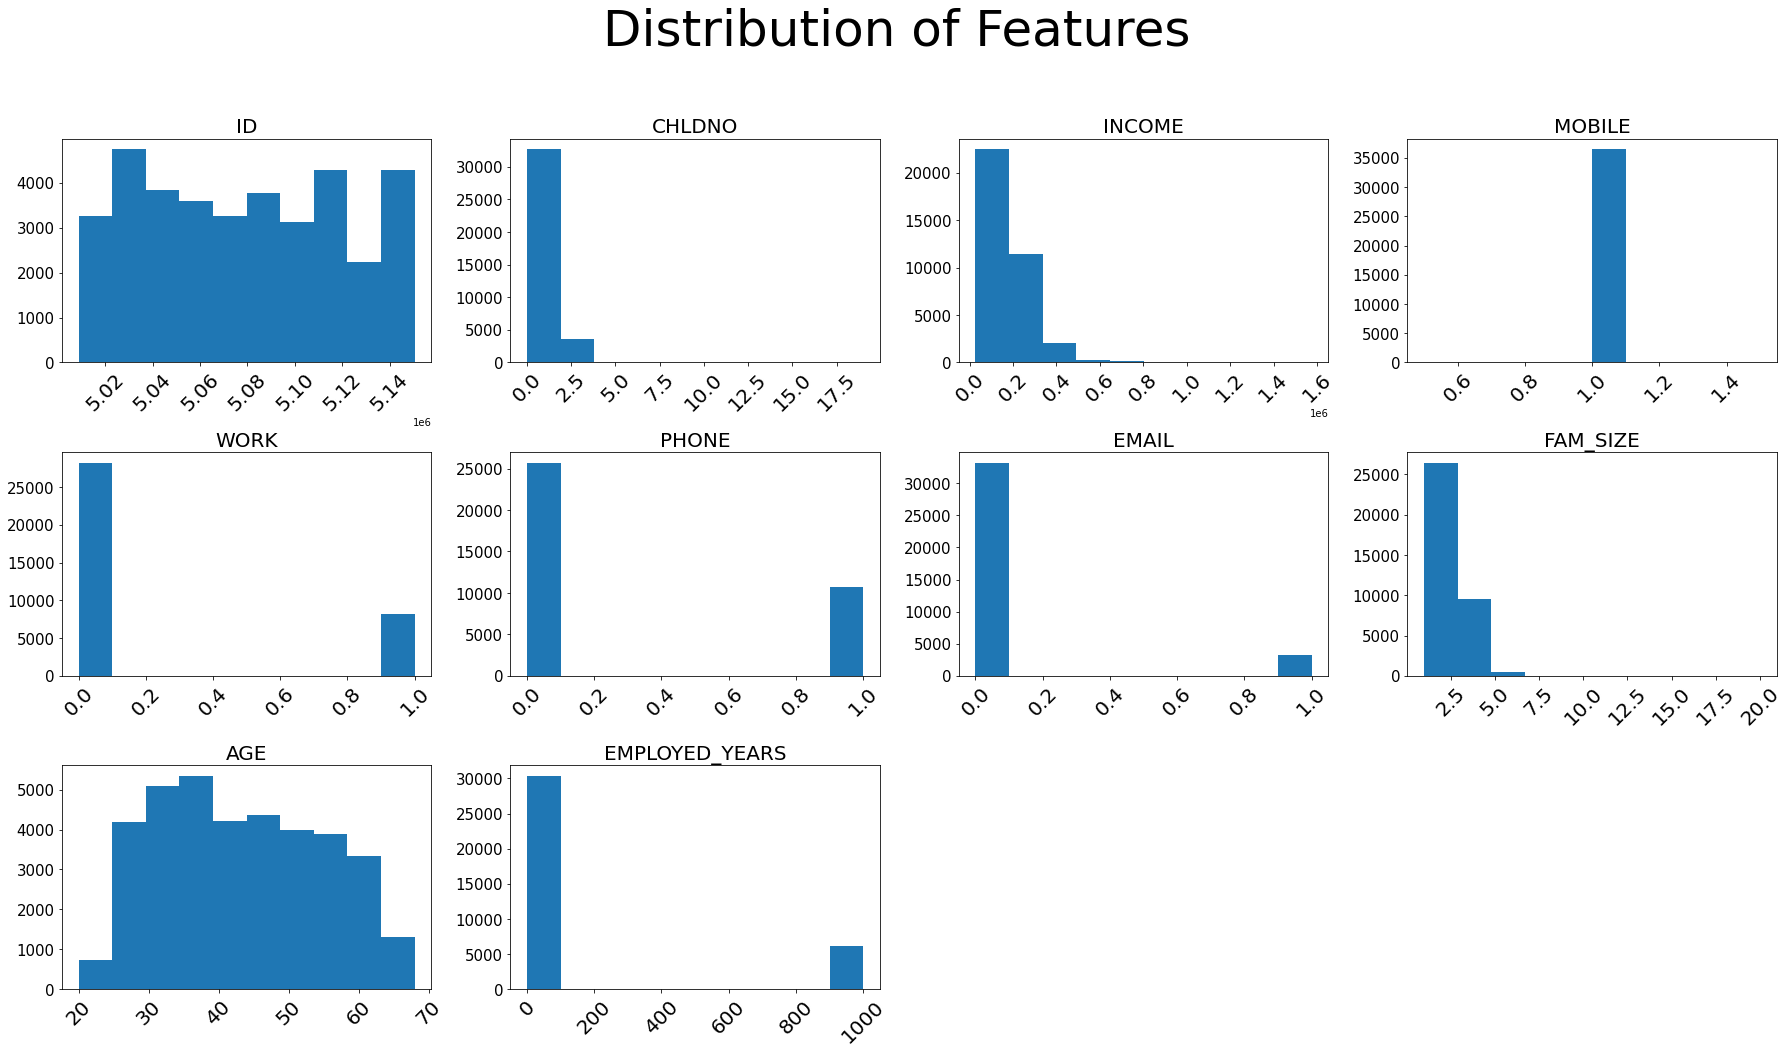

In [69]:
from matplotlib import cm
fig = plt.figure(figsize=(25,15)) ## Plot Size 
st = fig.suptitle("Distribution of Features", fontsize=50,
                  verticalalignment='center') # Plot Main Title 

for col,num in zip(model_data.toPandas().describe().columns, range(1,11)):
    ax = fig.add_subplot(3,4,num)
    ax.hist(model_data.toPandas()[col])
    #plt.style.use('dark_background') 
    plt.grid(False)
    plt.xticks(rotation=45,fontsize=20)
    plt.yticks(fontsize=15)
    plt.title(col.upper(),fontsize=20)
plt.tight_layout()
st.set_y(0.95)
fig.subplots_adjust(top=0.85,hspace = 0.4)
plt.show()

#### Mobile is useless feature here and email. Age is well distributed .
Employed_years is having few in 1000 which we need to eliminate to get more distributed.
Most of the applicants is not having work phone.
Most of the applicants is not having lan phone.
Income is having outliers which we need to correct.
Chldno is having outliers like 17 which seems to be incorrect
Family Size till 20 

In [70]:
#2.Is homeownership higher among male applicants or female applicants?

In [71]:
model_data.groupby("gender","own_reality").count().toPandas()

,gender,own_reality,count
0,F,N,7600
1,F,Y,16830
2,M,Y,7676
3,M,N,4351


In [85]:
female_owners=model_data.filter((model_data["gender"] == 'F') & (model_data["own_reality"]== "Y")).count()
female_owners

16830

In [86]:
total_owners=model_data.filter(model_data["own_reality"]== "Y").count()
total_owners

24506

In [87]:
print("Proportion of female owning reality",(female_owners/total_owners)*100)

Proportion of female owning reality 68.67705867950707


#### Female applicants own homes than males by 68.6%

In [88]:
## Is there any correlation between the customer's income level and education level?

In [89]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [90]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [91]:
model_data.groupby("edu_type","income_type").count().toPandas()

,edu_type,income_type,count
0,Higher education,State servant,1231
1,Lower secondary,Working,162
2,Incomplete higher,State servant,94
3,Academic degree,Pensioner,1
4,Incomplete higher,Working,795
5,Lower secondary,Pensioner,160
6,Secondary / secondary special,Pensioner,4920
7,Higher education,Commercial associate,2977
8,Secondary / secondary special,Commercial associate,5000
9,Higher education,Student,9


In [92]:
model_data.groupby("gender","own_reality").count().toPandas()

,gender,own_reality,count
0,F,N,7600
1,F,Y,16830
2,M,Y,7676
3,M,N,4351


#### Edu_type and income_type are categorical features so converting using ordinal and string indexing method

In [93]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(model_pd[["edu_type"]])
model_pd[["eduenc_type"]] = enc.transform(model_pd[["edu_type"]])

In [94]:
model_dl=sqlc.createDataFrame(model_pd)

In [95]:
model_pd["income_type"].value_counts()

Working                 18819
Commercial associate     8490
Pensioner                6152
State servant            2985
Student                    11
Name: income_type, dtype: int64

In [96]:
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler

In [97]:
si = StringIndexer(inputCol="income_type", outputCol="income_type_ix")
model_dl = si.fit(model_dl).transform(model_dl)

In [98]:
model_dl.toPandas().head(4)

,id,gender,own_car,own_reality,chldno,income,income_type,edu_type,fam_status,house_type,...,phone,email,occu_type,fam_size,age,employed_years,months_bal,outcome,eduenc_type,income_type_ix
0,5009033,F,N,N,0,255150.0,Pensioner,Incomplete higher,Civil marriage,Rented apartment,...,0,0,None,2.0,51,1000,0,0,2.0,2.0
1,5009304,F,N,N,0,112500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,0,0,None,1.0,60,1000,0,0,4.0,2.0
2,5009355,F,N,N,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,1,0,Laborers,2.0,53,14,0,0,4.0,1.0
3,5009429,M,N,N,0,198000.0,Working,Secondary / secondary special,Single / not married,With parents,...,0,0,Laborers,1.0,23,3,0,0,4.0,0.0


In [99]:
model_pd1=model_dl.toPandas()

In [100]:
##Correlation heat map

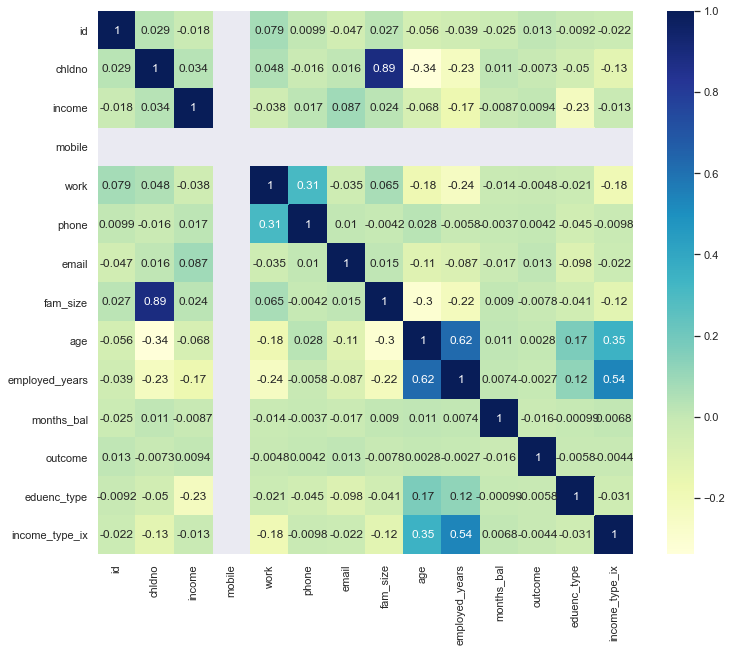

In [101]:
fig, ax = plt.subplots(figsize=(12,10)) 
dataplot = sns.heatmap(model_pd1.corr(), cmap="YlGnBu", annot=True,ax=ax)
plt.show()

In [ ]:
## there are high correlation between employed years and income type
#age and income type ,age and employed years
#work and phone,employed years and eductype

In [102]:
model_pd1.corr(method ='pearson')

,id,chldno,income,mobile,work,phone,email,fam_size,age,employed_years,months_bal,outcome,eduenc_type,income_type_ix
id,1.000000,0.028878,-0.017667,NaN,0.079215,0.009879,-0.046979,0.026624,-0.056036,-0.038801,-0.025194,0.013473,-0.009211,-0.022184
chldno,0.028878,1.000000,0.033691,NaN,0.048091,-0.016291,0.015960,0.889114,-0.339240,-0.231209,0.011469,-0.007283,-0.049823,-0.126058
income,-0.017667,0.033691,1.000000,NaN,-0.037746,0.017245,0.086681,0.023750,-0.067715,-0.168037,-0.008727,0.009432,-0.226931,-0.012952
mobile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work,0.079215,0.048091,-0.037746,NaN,1.000000,0.311644,-0.034838,0.064527,-0.179464,-0.242500,-0.014203,-0.004761,-0.021092,-0.183092
phone,0.009879,-0.016291,0.017245,NaN,0.311644,1.000000,0.010455,-0.004221,0.028494,-0.005842,-0.003714,0.004190,-0.044875,-0.009797
email,-0.046979,0.015960,0.086681,NaN,-0.034838,0.010455,1.000000,0.014619,-0.105531,-0.086969,-0.017209,0.013351,-0.098457,-0.021901
fam_size,0.026624,0.889114,0.023750,NaN,0.064527,-0.004221,0.014619,1.000000,-0.303887,-0.222561,0.009034,-0.007843,-0.041344,-0.123481
age,-0.056036,-0.339240,-0.067715,NaN,-0.179464,0.028494,-0.105531,-0.303887,1.000000,0.624223,0.011334,0.002806,0.169379,0.346300
employed_years,-0.038801,-0.231209,-0.168037,NaN,-0.242500,-0.005842,-0.086969,-0.222561,0.624223,1.000000,0.007405,-0.002658,0.123062,0.538117


#### Education level is negatively correlated with income type and income

In [103]:
# 4. What is the average and median salary of the applicant base?

In [104]:
model_pd1["income"].describe()

count    3.645700e+04
mean     1.866857e+05
std      1.017892e+05
min      2.700000e+04
25%      1.215000e+05
50%      1.575000e+05
75%      2.250000e+05
max      1.575000e+06
Name: income, dtype: float64

In [105]:
model_pd1["income"].mean()

186685.73666236937

In [106]:
print("Median income",model_pd1["income"].median())

Median income 157500.0


<AxesSubplot:>

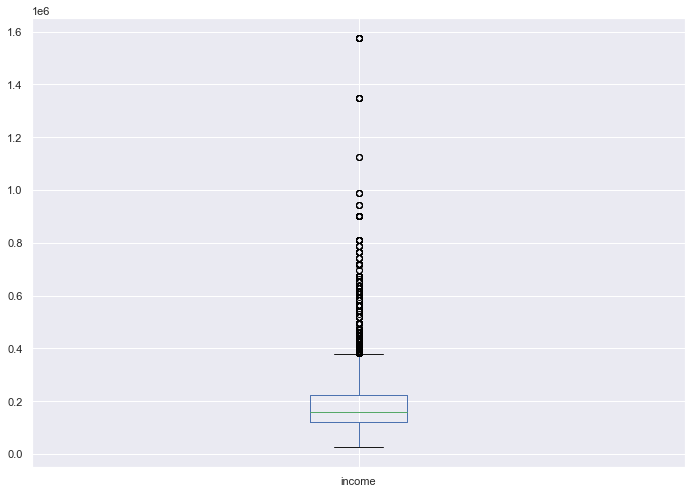

In [107]:
model_pd1["income"].plot(kind="box")

#### Median income : 157500.0 and Average is 186685 before the Outlier Treatment

In [108]:
### Fixing the outliers in income,employed_years,chlno,family size

In [109]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [110]:
model_pd1["income"].describe()

count     36457.000
mean     186685.737
std      101789.226
min       27000.000
25%      121500.000
50%      157500.000
75%      225000.000
max     1575000.000
Name: income, dtype: float64

In [111]:
model_pd1[model_pd1["income"] > 225000].count()

id                7769
gender            7769
own_car           7769
own_reality       7769
chldno            7769
income            7769
income_type       7769
edu_type          7769
fam_status        7769
house_type        7769
mobile            7769
work              7769
phone             7769
email             7769
occu_type         6045
fam_size          7769
age               7769
employed_years    7769
months_bal        7769
outcome           7769
eduenc_type       7769
income_type_ix    7769
dtype: int64

In [112]:
model_pd1.columns

Index(['id', 'gender', 'own_car', 'own_reality', 'chldno', 'income',
       'income_type', 'edu_type', 'fam_status', 'house_type', 'mobile', 'work',
       'phone', 'email', 'occu_type', 'fam_size', 'age', 'employed_years',
       'months_bal', 'outcome', 'eduenc_type', 'income_type_ix'],
      dtype='object')

In [113]:
model_pd1[(model_pd1["income"] > 225000) & (model_pd1["income"] < 1000000)]

,id,gender,own_car,own_reality,chldno,income,income_type,edu_type,fam_status,house_type,...,phone,email,occu_type,fam_size,age,employed_years,months_bal,outcome,eduenc_type,income_type_ix
0,5009033,F,N,N,0,255150.000,Pensioner,Incomplete higher,Civil marriage,Rented apartment,...,0,0,None,2.000,51,1000,0,0,2.000,2.000
4,5010070,F,N,Y,0,279000.000,State servant,Higher education,Single / not married,House / apartment,...,0,1,Managers,1.000,30,1,0,0,1.000,3.000
10,5011029,F,N,Y,0,292500.000,Working,Secondary / secondary special,Civil marriage,House / apartment,...,0,1,Sales staff,2.000,45,2,0,0,4.000,0.000
13,5021944,F,Y,Y,0,445500.000,Commercial associate,Higher education,Married,House / apartment,...,0,0,Managers,2.000,34,1,0,0,1.000,1.000
18,5023011,M,Y,N,0,360000.000,Working,Secondary / secondary special,Married,House / apartment,...,0,0,Private service staff,2.000,31,6,9,0,4.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36431,5126671,F,N,Y,0,351000.000,State servant,Secondary / secondary special,Single / not married,House / apartment,...,0,0,Medicine staff,1.000,47,11,39,0,4.000,3.000
36440,5143281,M,Y,Y,0,405000.000,Working,Secondary / secondary special,Married,House / apartment,...,0,0,Sales staff,2.000,49,1,24,0,4.000,0.000
36443,5143607,M,Y,Y,0,270000.000,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,...,0,1,None,2.000,29,2,0,0,4.000,1.000
36446,5146041,F,N,Y,0,360000.000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,0,Accountants,1.000,50,6,26,0,4.000,1.000


In [114]:
model_pd1[model_pd1["income"]== model_pd1["income"].max()]

,id,gender,own_car,own_reality,chldno,income,income_type,edu_type,fam_status,house_type,...,phone,email,occu_type,fam_size,age,employed_years,months_bal,outcome,eduenc_type,income_type_ix
2115,5143237,F,Y,Y,1,1575000.000,Commercial associate,Higher education,Single / not married,House / apartment,...,0,0,Managers,2.000,27,6,0,0,1.000,1.000
4524,5143236,F,Y,Y,1,1575000.000,Commercial associate,Higher education,Single / not married,House / apartment,...,0,0,Managers,2.000,27,6,0,0,1.000,1.000
5050,5143234,F,Y,Y,1,1575000.000,Commercial associate,Higher education,Single / not married,House / apartment,...,0,0,Managers,2.000,27,6,0,0,1.000,1.000
6680,5143231,F,Y,Y,1,1575000.000,Commercial associate,Higher education,Single / not married,House / apartment,...,0,0,Managers,2.000,27,6,7,0,1.000,1.000
12334,5143232,F,Y,Y,1,1575000.000,Commercial associate,Higher education,Single / not married,House / apartment,...,0,0,Managers,2.000,27,6,11,0,1.000,1.000
22227,5143233,F,Y,Y,1,1575000.000,Commercial associate,Higher education,Single / not married,House / apartment,...,0,0,Managers,2.000,27,6,0,0,1.000,1.000
22419,5143235,F,Y,Y,1,1575000.000,Commercial associate,Higher education,Single / not married,House / apartment,...,0,0,Managers,2.000,27,6,0,0,1.000,1.000
26596,5143238,F,Y,Y,1,1575000.000,Commercial associate,Higher education,Single / not married,House / apartment,...,0,0,Managers,2.000,27,6,26,0,1.000,1.000


In [115]:
##These seems to be the high outliers with 1575000 as the annual income better we impute them

In [116]:
model_pd1=model_pd1[~(model_pd1["income"]== model_pd1["income"].max())]

In [117]:
model_pd1.shape

(36449, 22)

In [118]:
model_pd1["income"].describe()

count     36449.000
mean     186381.023
std       99700.440
min       27000.000
25%      121500.000
50%      157500.000
75%      225000.000
max     1350000.000
Name: income, dtype: float64

In [119]:
model_pd2=model_pd1.copy(deep=False)

In [120]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [121]:
lowerbound,upperbound = outlier_treatment(model_pd2.income)

In [122]:
lowerbound,upperbound

(-33750.0, 380250.0)

In [123]:
model_pd2[(model_pd2.income < lowerbound) | (model_pd2.income > upperbound)]

,id,gender,own_car,own_reality,chldno,income,income_type,edu_type,fam_status,house_type,...,phone,email,occu_type,fam_size,age,employed_years,months_bal,outcome,eduenc_type,income_type_ix
13,5021944,F,Y,Y,0,445500.000,Commercial associate,Higher education,Married,House / apartment,...,0,0,Managers,2.000,34,1,0,0,1.000,1.000
57,5048505,F,Y,Y,0,720000.000,State servant,Higher education,Widow,House / apartment,...,1,0,Core staff,1.000,41,14,0,0,1.000,3.000
60,5051030,M,Y,N,0,540000.000,Commercial associate,Higher education,Married,House / apartment,...,0,0,Laborers,2.000,47,4,0,0,1.000,1.000
138,5112626,F,N,Y,0,675000.000,Commercial associate,Higher education,Married,House / apartment,...,1,0,Managers,2.000,53,12,0,0,1.000,1.000
139,5112842,F,Y,Y,0,427500.000,Working,Higher education,Married,House / apartment,...,0,1,Accountants,2.000,54,6,0,0,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36368,5089961,M,Y,Y,3,450000.000,Working,Secondary / secondary special,Civil marriage,House / apartment,...,0,1,Managers,5.000,47,8,0,0,4.000,0.000
36401,5113116,F,N,Y,0,630000.000,State servant,Higher education,Married,House / apartment,...,0,0,Managers,2.000,58,12,0,0,1.000,3.000
36425,5125440,M,Y,Y,1,810000.000,Commercial associate,Higher education,Married,House / apartment,...,1,1,None,3.000,50,12,0,0,1.000,1.000
36440,5143281,M,Y,Y,0,405000.000,Working,Secondary / secondary special,Married,House / apartment,...,0,0,Sales staff,2.000,49,1,24,0,4.000,0.000


In [124]:
model_pd2.drop(model_pd2[ (model_pd2.income > upperbound) | (model_pd2.income < lowerbound) ].index , inplace=True)

In [125]:
model_pd2.shape

(34928, 22)

In [126]:
model_pd2["income"].describe()

count    34928.000
mean    172742.037
std      71227.006
min      27000.000
25%     117000.000
50%     157500.000
75%     225000.000
max     378000.000
Name: income, dtype: float64

#### Median income : 157500 and Average is 172742 after the Outlier Treatment

<AxesSubplot:>

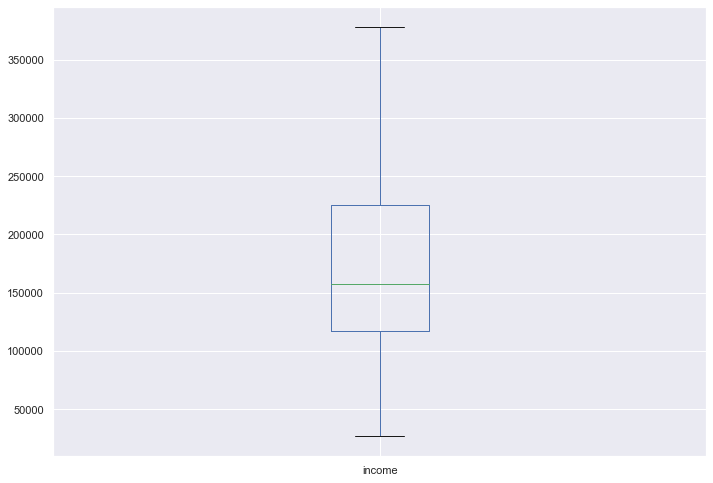

In [127]:
model_pd2["income"].plot(kind="box")

In [128]:
lowerbound,upperbound = outlier_treatment(model_pd2.chldno)

In [129]:
model_pd2[(model_pd2.chldno < lowerbound) | (model_pd2.chldno > upperbound)]

,id,gender,own_car,own_reality,chldno,income,income_type,edu_type,fam_status,house_type,...,phone,email,occu_type,fam_size,age,employed_years,months_bal,outcome,eduenc_type,income_type_ix
209,5028975,F,Y,Y,3,180000.000,Commercial associate,Secondary / secondary special,Married,House / apartment,...,1,0,High skill tech staff,5.000,31,1,29,0,4.000,1.000
258,5067126,F,Y,Y,4,112500.000,Working,Secondary / secondary special,Married,House / apartment,...,0,0,Medicine staff,6.000,37,11,0,0,4.000,0.000
310,5116260,F,N,Y,4,180000.000,Commercial associate,Secondary / secondary special,Married,House / apartment,...,0,0,Core staff,6.000,47,20,3,0,4.000,1.000
318,5117356,F,N,Y,3,135000.000,Commercial associate,Secondary / secondary special,Married,House / apartment,...,0,0,Sales staff,5.000,33,6,0,0,4.000,1.000
778,5037208,M,N,Y,3,180000.000,Working,Secondary / secondary special,Married,House / apartment,...,1,0,Drivers,5.000,34,5,0,0,4.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36192,5104944,F,N,Y,3,67500.000,Commercial associate,Secondary / secondary special,Married,House / apartment,...,1,0,Sales staff,5.000,45,1,13,0,4.000,1.000
36269,5023566,M,Y,Y,3,270000.000,Commercial associate,Secondary / secondary special,Married,House / apartment,...,1,0,Laborers,5.000,33,3,0,0,4.000,1.000
36343,5066850,M,Y,Y,3,202500.000,Working,Secondary / secondary special,Married,House / apartment,...,1,1,None,5.000,43,13,0,0,4.000,0.000
36416,5116675,M,Y,Y,3,270000.000,Working,Secondary / secondary special,Married,House / apartment,...,0,0,Laborers,5.000,36,1,0,0,4.000,0.000


<AxesSubplot:>

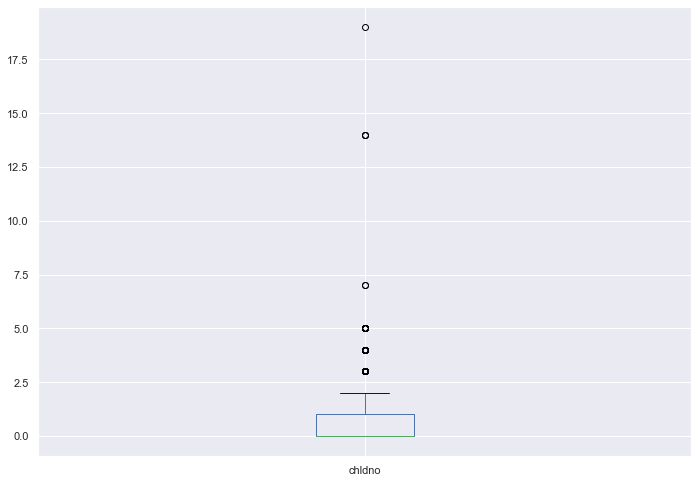

In [130]:
model_pd2["chldno"].plot(kind="box")

In [131]:
model_pd2.drop(model_pd2[ (model_pd2.chldno > upperbound) | (model_pd2.chldno < lowerbound) ].index , inplace=True)

<AxesSubplot:>

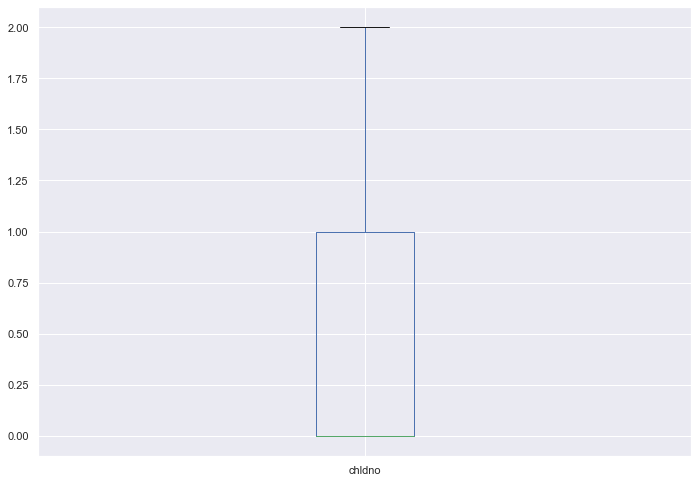

In [132]:
model_pd2["chldno"].plot(kind="box")

In [133]:
model_pd2.shape

(34455, 22)

In [134]:
model_pd2.fam_size.describe()

count   34455.000
mean        2.152
std         0.831
min         1.000
25%         2.000
50%         2.000
75%         3.000
max         4.000
Name: fam_size, dtype: float64

In [135]:
### Employed years with 1000 data
model_pd2["employed_years"].describe()

count   34455.000
mean      180.744
std       377.615
min         0.000
25%         3.000
50%         6.000
75%        16.000
max      1000.000
Name: employed_years, dtype: float64

In [136]:
model_pd2[model_pd2.employed_years == 1000]

,id,gender,own_car,own_reality,chldno,income,income_type,edu_type,fam_status,house_type,...,phone,email,occu_type,fam_size,age,employed_years,months_bal,outcome,eduenc_type,income_type_ix
0,5009033,F,N,N,0,255150.000,Pensioner,Incomplete higher,Civil marriage,Rented apartment,...,0,0,None,2.000,51,1000,0,0,2.000,2.000
1,5009304,F,N,N,0,112500.000,Pensioner,Secondary / secondary special,Widow,House / apartment,...,0,0,None,1.000,60,1000,0,0,4.000,2.000
6,5010338,F,N,N,0,216000.000,Pensioner,Secondary / secondary special,Married,House / apartment,...,0,0,None,2.000,62,1000,0,0,4.000,2.000
8,5010624,F,N,Y,0,103500.000,Pensioner,Incomplete higher,Married,House / apartment,...,1,0,None,2.000,60,1000,0,0,2.000,2.000
19,5023430,F,N,Y,0,108000.000,Pensioner,Secondary / secondary special,Married,House / apartment,...,1,0,None,2.000,63,1000,0,0,4.000,2.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36412,5115767,F,N,Y,0,135000.000,Pensioner,Higher education,Married,House / apartment,...,0,0,None,2.000,56,1000,0,0,1.000,2.000
36422,5118377,F,N,N,0,90000.000,Pensioner,Secondary / secondary special,Married,House / apartment,...,1,0,None,2.000,56,1000,0,0,4.000,2.000
36430,5126185,F,N,N,0,94500.000,Pensioner,Secondary / secondary special,Married,House / apartment,...,1,1,None,2.000,58,1000,0,0,4.000,2.000
36436,5139432,F,N,Y,0,135000.000,Pensioner,Secondary / secondary special,Separated,House / apartment,...,0,0,None,1.000,59,1000,0,0,4.000,2.000


In [137]:
## All these seems to be pensioner so taking mean of pensioner lets impute this with median 

model_pd2["income_type"].value_counts()

Working                 17828
Commercial associate     7801
Pensioner                6049
State servant            2766
Student                    11
Name: income_type, dtype: int64

In [138]:
model_pd2.shape

(34455, 22)

In [139]:
(6036/34455)*100

17.518502394427514

In [140]:
34455-6036

28419

In [141]:
#dropping these outliers
model_pd2.drop(model_pd2[model_pd2.employed_years == 1000].index,inplace=True)

In [142]:
model_pd2.shape

(28419, 22)

In [143]:
model_pd2["employed_years"].describe()

count   28419.000
mean        6.740
std         6.528
min         0.000
25%         2.000
50%         5.000
75%         9.000
max        43.000
Name: employed_years, dtype: float64

In [144]:
lowerbound,upperbound = outlier_treatment(model_pd2.employed_years)

In [145]:
model_pd2[(model_pd2.employed_years < lowerbound) | (model_pd2.employed_years > upperbound)]

,id,gender,own_car,own_reality,chldno,income,income_type,edu_type,fam_status,house_type,...,phone,email,occu_type,fam_size,age,employed_years,months_bal,outcome,eduenc_type,income_type_ix
83,5068039,F,N,N,0,112500.000,State servant,Secondary / secondary special,Married,With parents,...,0,0,Medicine staff,2.000,47,25,0,0,4.000,3.000
96,5074703,F,N,Y,0,157500.000,Working,Higher education,Single / not married,House / apartment,...,0,0,Laborers,1.000,60,29,44,0,1.000,0.000
137,5112603,F,N,Y,0,103500.000,Working,Secondary / secondary special,Married,House / apartment,...,1,0,Managers,2.000,61,35,0,0,4.000,0.000
142,5114052,F,N,N,0,90000.000,Working,Secondary / secondary special,Married,House / apartment,...,0,0,None,2.000,51,21,0,0,4.000,0.000
175,5148461,F,N,N,0,135000.000,Working,Secondary / secondary special,Civil marriage,House / apartment,...,0,0,Laborers,2.000,52,29,26,0,4.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36321,5050487,F,N,N,0,292500.000,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,...,0,0,Laborers,2.000,51,29,26,0,4.000,1.000
36329,5058398,F,N,Y,0,54000.000,Working,Secondary / secondary special,Married,House / apartment,...,1,0,None,2.000,51,21,0,0,4.000,0.000
36357,5086062,F,N,Y,0,135000.000,State servant,Secondary / secondary special,Married,House / apartment,...,1,0,Core staff,2.000,56,25,29,0,4.000,3.000
36373,5091092,F,N,Y,2,112500.000,Working,Higher education,Married,House / apartment,...,0,0,None,4.000,53,30,0,0,1.000,0.000


In [146]:
model_pd2.drop(model_pd2[ (model_pd2.employed_years > upperbound) | (model_pd2.employed_years < lowerbound) ].index , inplace=True)

In [147]:
model_pd2.shape

(26732, 22)

In [148]:
###Treating Occupation missing values
model_pd2[model_pd2["occu_type"].isnull()]

,id,gender,own_car,own_reality,chldno,income,income_type,edu_type,fam_status,house_type,...,phone,email,occu_type,fam_size,age,employed_years,months_bal,outcome,eduenc_type,income_type_ix
9,5010629,F,N,Y,0,180000.000,Working,Secondary / secondary special,Single / not married,House / apartment,...,0,0,None,1.000,53,5,4,0,4.000,0.000
15,5022024,M,Y,Y,0,112500.000,Working,Secondary / secondary special,Single / not married,House / apartment,...,0,0,None,1.000,27,4,6,0,4.000,0.000
46,5044479,F,N,N,0,135000.000,Working,Secondary / secondary special,Married,House / apartment,...,0,0,None,2.000,48,6,3,0,4.000,0.000
47,5044757,F,N,Y,1,121500.000,Working,Incomplete higher,Single / not married,House / apartment,...,0,0,None,2.000,37,4,17,0,2.000,0.000
62,5052702,M,Y,Y,1,270000.000,Working,Secondary / secondary special,Married,House / apartment,...,0,0,None,3.000,33,0,0,0,4.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36435,5137154,F,N,N,0,211500.000,Working,Secondary / secondary special,Married,House / apartment,...,1,0,None,2.000,47,4,0,0,4.000,0.000
36437,5139525,M,N,Y,0,135000.000,Working,Higher education,Married,With parents,...,1,0,None,2.000,40,8,8,0,1.000,0.000
36438,5142276,M,N,Y,0,189000.000,Commercial associate,Higher education,Single / not married,House / apartment,...,0,0,None,1.000,22,0,26,0,1.000,1.000
36443,5143607,M,Y,Y,0,270000.000,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,...,0,1,None,2.000,29,2,0,0,4.000,1.000


In [149]:
cond = (model_pd2["occu_type"].isnull()) & (model_pd2["income_type"] == "Pensioner")
model_pd2["occu_type"] = model_pd2["occu_type"].fillna(cond.map({True:'Retired', False: 'Others'}))


In [150]:
model_pd2["occu_type"].value_counts()

Laborers                 5658
Others                   4498
Sales staff              3308
Core staff               3096
Managers                 2301
Drivers                  1980
High skill tech staff    1190
Accountants              1104
Medicine staff            965
Cooking staff             594
Security staff            548
Cleaning staff            513
Private service staff     291
Low-skill Laborers        173
Waiters/barmen staff      168
Secretaries               136
HR staff                   81
Realty agents              74
IT staff                   51
Retired                     3
Name: occu_type, dtype: int64

In [151]:
## 5. Is the proportion of bad customers higher for people who own cars?

In [152]:
model_pd2.groupby(['outcome', 'own_car']).size()

outcome  own_car
0        N          15643
         Y          11016
1        N             50
         Y             23
dtype: int64

<AxesSubplot:xlabel='outcome,own_car'>

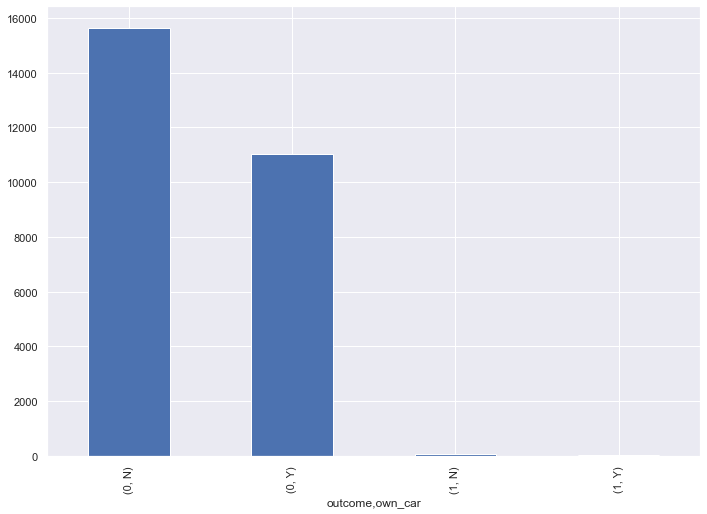

In [153]:
model_pd2.groupby(['outcome', 'own_car']).size().plot(kind="bar")

#### The porportion of bad customers not own cars as it is only 23 out of 73 who are owning cars

In [154]:
##6.Is the proportion of bad customers higher for those living on rent than the rest of the population?
model_pd2.groupby(['outcome', 'own_reality']).size()

outcome  own_reality
0        N               9446
         Y              17213
1        N                 21
         Y                 52
dtype: int64

In [155]:
model_pd2.groupby(['outcome', 'house_type']).size()

outcome  house_type         
0        Co-op apartment          134
         House / apartment      23340
         Municipal apartment      846
         Office apartment         197
         Rented apartment         499
         With parents            1643
1        Co-op apartment            1
         House / apartment         63
         Municipal apartment        4
         Rented apartment           2
         With parents               3
dtype: int64

In [156]:
model_pd2.groupby(['outcome']).size()

outcome
0    26659
1       73
dtype: int64

In [157]:
(2/73) * 100

2.73972602739726

In [158]:
499/26659 *100

1.8717881390899884

##### The proportion of the bad customers in rent is more than the good customers 2.73 % are in rent than 1.8% of good in rent

In [159]:
##7.Is the proportion of bad customers higher for those who are single than married customers?

In [160]:
model_pd2.groupby(['outcome', 'fam_status']).size()

outcome  fam_status          
0        Civil marriage           2375
         Married                 18459
         Separated                1498
         Single / not married     3698
         Widow                     629
1        Civil marriage              1
         Married                    49
         Separated                   2
         Single / not married       18
         Widow                       3
dtype: int64

In [161]:
print("Single good",(3698/26659)*100)

Single good 13.871488052815184


In [162]:
print("Single bad",(18/73)*100)

Single bad 24.65753424657534


In [163]:
print("Married bad",(49/73) *100)

Married bad 67.12328767123287


In [164]:
print("married good",(18459/26659)*100)

married good 69.24115683258937


In [165]:
#### The proportion of bad customers are higher for those who are married than single .

In [166]:
### Dropping unnecessary columns like id,months_balance,mobile

model_pd2.drop(["id","months_bal","mobile"],axis=1,inplace=True)

In [167]:
model_pd2.columns

Index(['gender', 'own_car', 'own_reality', 'chldno', 'income', 'income_type',
       'edu_type', 'fam_status', 'house_type', 'work', 'phone', 'email',
       'occu_type', 'fam_size', 'age', 'employed_years', 'outcome',
       'eduenc_type', 'income_type_ix'],
      dtype='object')

In [168]:
model_pd3=model_pd2.copy(deep=False)

#### Binning Necessary Continous Values

In [169]:
### Binning the numerical values income,chlno,family size,age,employed years
incomelabels=["Low","Medium","High","VeryHigh"]

model_pd3["income_bins"]=pd.qcut(x=model_pd3["income"],q=4,labels=incomelabels)

In [170]:
model_pd3["income_bins"].value_counts()

High        8032
Low         6777
Medium      6633
VeryHigh    5290
Name: income_bins, dtype: int64

In [171]:
childlabels=["No","more than 1"]

model_pd3["chldno_bins"]=pd.cut(x=model_pd3["chldno"],bins=[0,1,2],labels=childlabels,include_lowest=True)

In [172]:
model_pd3["chldno_bins"].value_counts()

No             23727
more than 1     3005
Name: chldno_bins, dtype: int64

In [173]:
model_pd3["chldno_bins"].isnull().sum()

0

In [174]:
employedlabels=["low","medium","high","very high"]

model_pd3["emp_yrs_bins"]=pd.cut(x=model_pd3["employed_years"],bins=[0,5,10,15,20],labels=employedlabels,include_lowest=True)

In [175]:
model_pd3["emp_yrs_bins"].value_counts()

low          15346
medium        7499
high          2930
very high      957
Name: emp_yrs_bins, dtype: int64

In [176]:
model_pd3["emp_yrs_bins"].isnull().sum()

0

In [177]:
bins = [0,21,30,35,40,45,60,80]
labels=["less <21", "21-31", "31-35","35-40","40-45","45-60",">60"]
model_pd3["age_bins"]=pd.cut(x=model_pd3["age"],bins=bins,labels=labels)

In [178]:
model_pd3["age_bins"].value_counts()

45-60       7122
21-31       5679
35-40       4882
31-35       4739
40-45       3995
>60          304
less <21      11
Name: age_bins, dtype: int64

In [179]:
model_pd3["age_bins"].isnull().sum()

0

In [180]:
model_pd3["fam_size"].describe()

count   26732.000
mean        2.257
std         0.863
min         1.000
25%         2.000
50%         2.000
75%         3.000
max         4.000
Name: fam_size, dtype: float64

In [181]:
famlabels=["low","medium"]

model_pd3["fam_size_bins"]=pd.cut(x=model_pd3["fam_size"],bins=[0,2,5],labels=famlabels,include_lowest=True)

In [182]:
model_pd3["fam_size_bins"].value_counts()

low       18148
medium     8584
Name: fam_size_bins, dtype: int64

In [183]:
model_pd3["fam_size_bins"].isnull().sum()

0

In [184]:
model_pd3.head(4)

,gender,own_car,own_reality,chldno,income,income_type,edu_type,fam_status,house_type,work,...,age,employed_years,outcome,eduenc_type,income_type_ix,income_bins,chldno_bins,emp_yrs_bins,age_bins,fam_size_bins
2,F,N,N,0,135000.000,Commercial associate,Secondary / secondary special,Married,House / apartment,1,...,53,14,0,4.000,1.000,Medium,No,high,45-60,low
3,M,N,N,0,198000.000,Working,Secondary / secondary special,Single / not married,With parents,1,...,23,3,0,4.000,0.000,High,No,low,21-31,low
4,F,N,Y,0,279000.000,State servant,Higher education,Single / not married,House / apartment,0,...,30,1,0,1.000,3.000,VeryHigh,No,low,21-31,low
5,M,Y,Y,0,225000.000,Working,Secondary / secondary special,Married,House / apartment,0,...,45,11,0,4.000,0.000,High,No,high,40-45,low


In [185]:
model_pd4=model_pd3.copy(deep=False)

In [186]:
model_pd4.drop(["income","employed_years","fam_size","chldno","income_type_ix","age"],axis=1,inplace=True)

In [187]:
model_pd4.columns

Index(['gender', 'own_car', 'own_reality', 'income_type', 'edu_type',
       'fam_status', 'house_type', 'work', 'phone', 'email', 'occu_type',
       'outcome', 'eduenc_type', 'income_bins', 'chldno_bins', 'emp_yrs_bins',
       'age_bins', 'fam_size_bins'],
      dtype='object')

In [188]:
clean_data=sqlc.createDataFrame(model_pd4)

### Calculating WOE and IV

In [189]:
import math

from pyspark.sql import DataFrame
from pyspark.sql import functions as F


class WOE_IV(object):
    def __init__(self, df: DataFrame, cols_to_woe: [str], label_column: str, good_label: str):
        self.df = df
        self.cols_to_woe = cols_to_woe
        self.label_column = label_column
        self.good_label = good_label
        self.fit_data = {}

    def fit(self):
        for col_to_woe in self.cols_to_woe:
            total_good = self.compute_total_amount_of_good()
            total_bad = self.compute_total_amount_of_bad()
            
            woe_df = self.df.select(col_to_woe)
            categories = woe_df.distinct().collect()
            for category_row in categories:
                category = category_row[col_to_woe]
                good_amount = self.compute_good_amount(col_to_woe, category)
                bad_amount = self.compute_bad_amount(col_to_woe, category)

                good_amount = good_amount if good_amount != 0 else 0.5
                bad_amount = bad_amount if bad_amount != 0 else 0.5

                good_dist = good_amount / total_good
                bad_dist = bad_amount / total_bad

                self.build_fit_data(col_to_woe, category, good_dist, bad_dist)

    def transform(self, df: DataFrame):
        def _encode_woe(col_to_woe_):
            return F.coalesce(
                *[F.when(F.col(col_to_woe_) == category, F.lit(woe_iv['woe']))
                  for category, woe_iv in self.fit_data[col_to_woe_].items()]
            )

        for col_to_woe, woe_info in self.fit_data.items():
            df = df.withColumn(col_to_woe + '_woe', _encode_woe(col_to_woe))
        return df

    def compute_total_amount_of_good(self):
        return self.df.select(self.label_column).filter(F.col(self.label_column) == self.good_label).count()

    def compute_total_amount_of_bad(self):
        return self.df.select(self.label_column).filter(F.col(self.label_column) != self.good_label).count()

    def compute_good_amount(self, col_to_woe: str, category: str):
        return self.df.select(col_to_woe, self.label_column)\
                      .filter(
                            (F.col(col_to_woe) == category) & (F.col(self.label_column) == self.good_label)
                      ).count()

    def compute_bad_amount(self, col_to_woe: str, category: str):
        return self.df.select(col_to_woe, self.label_column)\
                      .filter(
                            (F.col(col_to_woe) == category) & (F.col(self.label_column) != self.good_label)
                      ).count()

    def build_fit_data(self, col_to_woe, category, good_dist, bad_dist):
        woe_info = {
            category: {
                'woe': math.log(good_dist / bad_dist),
                'iv': (good_dist - bad_dist) * math.log(good_dist / bad_dist)
            }
        }

        if col_to_woe not in self.fit_data:
            self.fit_data[col_to_woe] = woe_info
        else:
            self.fit_data[col_to_woe].update(woe_info)

    def compute_iv(self):
        iv_dict = {}

        for woe_col, categories in self.fit_data.items():
            iv_dict[woe_col] = 0
            for category, woe_iv in categories.items():
                iv_dict[woe_col] += woe_iv['iv']
        return iv_dict



In [190]:
cols_to_woe = clean_data.columns
woe = WOE_IV(clean_data, cols_to_woe, 'outcome', 0)

# woe encoding
woe.fit()
encoding_df = woe.transform(clean_data)

# information value
ivs = woe.compute_iv()

In [191]:
encoding_df.toPandas().head(5)

,gender,own_car,own_reality,income_type,edu_type,fam_status,house_type,work,phone,email,...,phone_woe,email_woe,occu_type_woe,outcome_woe,eduenc_type_woe,income_bins_woe,chldno_bins_woe,emp_yrs_bins_woe,age_bins_woe,fam_size_bins_woe
0,F,N,N,Commercial associate,Secondary / secondary special,Married,House / apartment,1,1,0,...,0.102,0.026,0.099,4.984,0.072,0.189,-0.078,0.471,-0.329,-0.104
1,M,N,N,Working,Secondary / secondary special,Single / not married,With parents,1,0,0,...,-0.038,0.026,0.099,4.984,0.072,0.044,-0.078,-0.002,0.103,-0.104
2,F,N,Y,State servant,Higher education,Single / not married,House / apartment,0,0,1,...,-0.038,-0.205,0.046,4.984,-0.017,0.031,-0.078,-0.002,0.103,-0.104
3,M,Y,Y,Working,Secondary / secondary special,Married,House / apartment,0,0,0,...,-0.038,0.026,-0.104,4.984,0.072,0.044,-0.078,0.471,0.311,-0.104
4,F,Y,Y,Commercial associate,Secondary / secondary special,Married,House / apartment,0,0,0,...,-0.038,0.026,0.099,4.984,0.072,0.189,-0.078,0.471,-0.183,0.265


In [192]:
ivs

{'gender': 0.027057549679532604,
 'own_car': 0.04179770274616645,
 'own_reality': 0.020439800170587212,
 'income_type': 0.28510283880505527,
 'edu_type': 0.04803952077071605,
 'fam_status': 0.2342531359875759,
 'house_type': 0.033138498312494866,
 'work': 0.015266266506309899,
 'phone': 0.003909243056567676,
 'email': 0.005282087712231127,
 'occu_type': 0.4911977033799512,
 'outcome': 15.833297459753336,
 'eduenc_type': 0.04803952077071605,
 'income_bins': 0.022295173434377397,
 'chldno_bins': 0.0776259043532662,
 'emp_yrs_bins': 0.029386338095149407,
 'age_bins': 0.10851743085436731,
 'fam_size_bins': 0.027597538957284104}

In [193]:
iv_df=pd.DataFrame.from_dict(ivs,orient='index')

In [194]:
iv_df

,0
gender,0.027
own_car,0.042
own_reality,0.020
income_type,0.285
edu_type,0.048
fam_status,0.234
house_type,0.033
work,0.015
phone,0.004
email,0.005


In [195]:
###Identifying weak predictor
iv_df[iv_df[0] < 0.1]

,0
gender,0.027
own_car,0.042
own_reality,0.020
edu_type,0.048
house_type,0.033
work,0.015
phone,0.004
email,0.005
eduenc_type,0.048
income_bins,0.022


In [196]:
###Identifying medium and strong predictor
iv_df[iv_df[0] > 0.1]

,0
income_type,0.285
fam_status,0.234
occu_type,0.491
outcome,15.833
age_bins,0.109


In [366]:

encoding_df.columns

['gender',
 'own_car',
 'own_reality',
 'income_type',
 'edu_type',
 'fam_status',
 'house_type',
 'work',
 'phone',
 'email',
 'occu_type',
 'outcome',
 'eduenc_type',
 'income_bins',
 'chldno_bins',
 'emp_yrs_bins',
 'age_bins',
 'fam_size_bins',
 'gender_woe',
 'own_car_woe',
 'own_reality_woe',
 'income_type_woe',
 'edu_type_woe',
 'fam_status_woe',
 'house_type_woe',
 'work_woe',
 'phone_woe',
 'email_woe',
 'occu_type_woe',
 'outcome_woe',
 'eduenc_type_woe',
 'income_bins_woe',
 'chldno_bins_woe',
 'emp_yrs_bins_woe',
 'age_bins_woe',
 'fam_size_bins_woe']

In [218]:
##Selected the columns where IV > 0.1 and IV >0.05
cleaned_ex1=encoding_df.select("income_type_woe","fam_status_woe","occu_type_woe","age_bins_woe",
                               "income_bins_woe","chldno_bins_woe","outcome","own_car_woe")

In [219]:
cleaned_ex1.toPandas().head(3)

,income_type_woe,fam_status_woe,occu_type_woe,age_bins_woe,income_bins_woe,chldno_bins_woe,outcome,own_car_woe
0,-0.021,0.031,0.099,-0.329,0.189,-0.078,0,-0.155
1,-0.068,-0.575,0.099,0.103,0.044,-0.078,0,-0.155
2,1.888,-0.575,0.046,0.103,0.031,-0.078,0,-0.155


In [220]:
cleaned_ex2=cleaned_ex1.withColumnRenamed("outcome","label")

In [221]:
cleaned_ex2.columns

['income_type_woe',
 'fam_status_woe',
 'occu_type_woe',
 'age_bins_woe',
 'income_bins_woe',
 'chldno_bins_woe',
 'label',
 'own_car_woe']

In [ ]:
##Model Building this is an iterative process and have taking from model0 to model 2
#for fine tuning

In [ ]:
##Fisrt Model we are going to take the following features with standard threshold 0.5 and lets see
#'income_type_woe',
 #'fam_status_woe',
 #'occu_type_woe',
 #'age_bins_woe',
 #'income_bins_woe',
 #'chldno_bins_woe',
 #'label',
 #'edu_type_woe',
 #'own_car_woe'
#gender_woe

In [222]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression

In [224]:
#create a feature vector using the vector assembler. 
trainCols = cleaned_ex2.columns
trainCols.remove("label")
assembler = VectorAssembler(inputCols=trainCols, outputCol='features')
cleaned_ex2 = assembler.transform(cleaned_ex2)

In [225]:
train, test = cleaned_ex2.randomSplit([0.7,0.3])

In [226]:
dataset_size=float(train.select("label").count())
numPositives=train.select("label").where('label == 1').count()
per_ones=(float(numPositives)/float(dataset_size))*100
numNegatives=float(dataset_size-numPositives)
print('The number of ones are {}'.format(numPositives))
print('Percentage of ones are {}'.format(per_ones))

The number of ones are 53
Percentage of ones are 0.28342245989304815


In [227]:
##Model0 with standard 0.5 threshold
from pyspark.ml.classification import LogisticRegression
lr_0 = LogisticRegression(labelCol="label", featuresCol="features",maxIter=10)
model_0=lr_0.fit(train)
predict_train=model_0.transform(train)
predict_0=model_0.transform(test)
predict_0.select("label","prediction","probability").show(10)

+-----+----------+--------------------+
|label|prediction|         probability|
+-----+----------+--------------------+
|    1|       0.0|[0.93891188386346...|
|    0|       1.0|[0.30709677377136...|
|    1|       1.0|[0.24930522741297...|
|    0|       0.0|[0.99277878646219...|
|    0|       0.0|[0.99707015106321...|
|    0|       0.0|[0.99874880328847...|
|    0|       0.0|[0.99261483862959...|
|    0|       0.0|[0.99261483862959...|
|    0|       0.0|[0.99921290113304...|
|    0|       0.0|[0.89187854127329...|
+-----+----------+--------------------+
only showing top 10 rows



In [228]:
result1=model_0.evaluate(test)

In [229]:
print("recall",result1.recallByLabel)

recall [0.9998751872191712, 0.05]


In [230]:
print("AUC",result1.areaUnderROC)

AUC 0.66393222666001


In [231]:
print("precision",result1.precisionByLabel)

precision [0.9976338729763388, 0.5]


In [232]:
##Best threshold suggested by Logit
fMeasure = result1.fMeasureByThreshold
bestThreshold = fMeasure.orderBy(fMeasure['F-Measure'].desc()).first().threshold

In [233]:
print("best threshold",bestThreshold)

best threshold 0.05787044085881421


#### Evaluation of Model 0 with standard cutoff

In [234]:
# initialize the evaluator
from pyspark.mllib.evaluation import BinaryClassificationMetrics
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
# calculate AUC
auc = evaluator.evaluate(predict_0, {evaluator.metricName: 'areaUnderROC'})
print('AUC for Model 0: %0.3f' % auc)
# compute TN, TP, FN, and FP
predict_0.groupBy('label', 'prediction').count().show()
# Calculate the elements of the confusion matrix
TN = predict_0.filter('prediction = 0 AND label = prediction').count()
TP = predict_0.filter('prediction = 1 AND label = prediction').count()
FN = predict_0.filter('prediction = 0 AND label <> prediction').count()
FP = predict_0.filter('prediction = 1 AND label <> prediction').count()
# calculate accuracy, precision, recall, and F1-score
accuracy = (TN + TP) / (TN + TP + FN + FP)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F =  2 * (precision*recall) / (precision + recall)
print('n precision: %0.3f' % precision)
print('n recall: %0.3f' % recall)
print('n accuracy: %0.3f' % accuracy)
print('n F1 score: %0.3f' % F)

AUC for Model 0: 0.664
+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|    1|       0.0|   19|
|    0|       1.0|    1|
|    0|       0.0| 8011|
|    1|       1.0|    1|
+-----+----------+-----+

n precision: 0.500
n recall: 0.050
n accuracy: 0.998
n F1 score: 0.091


In [ ]:
### The precision and recall is very bad in this model although the AUC and Accuracy is good

#### Model 2 after fine tuning the threshold

In [235]:
####Building Model1 with best threshold 0.043
from pyspark.ml.classification import LogisticRegression
lr2 = LogisticRegression(labelCol="label", featuresCol="features",maxIter=10,threshold=0.057)
model1=lr2.fit(train)
#predict_train=model.transform(train)
predictions_1=model1.transform(test)
predictions_1.select("label","prediction","probability").show(10)

+-----+----------+--------------------+
|label|prediction|         probability|
+-----+----------+--------------------+
|    1|       1.0|[0.93891188386346...|
|    0|       1.0|[0.30709677377136...|
|    1|       1.0|[0.24930522741297...|
|    0|       0.0|[0.99277878646219...|
|    0|       0.0|[0.99707015106321...|
|    0|       0.0|[0.99874880328847...|
|    0|       0.0|[0.99261483862959...|
|    0|       0.0|[0.99261483862959...|
|    0|       0.0|[0.99921290113304...|
|    0|       1.0|[0.89187854127329...|
+-----+----------+--------------------+
only showing top 10 rows



In [236]:
###Model Evaluation with 0.043 threshold
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator=BinaryClassificationEvaluator(rawPredictionCol="rawPrediction",labelCol="label")
predictions_1.select("label","rawPrediction","prediction","probability").show(5)
print("The area under ROC for train set is {}".format(evaluator.evaluate(predictions_1)))
print("The area under ROC for test set is {}".format(evaluator.evaluate(predictions_1)))

+-----+--------------------+----------+--------------------+
|label|       rawPrediction|prediction|         probability|
+-----+--------------------+----------+--------------------+
|    1|[2.73240428572746...|       1.0|[0.93891188386346...|
|    0|[-0.8137274228214...|       1.0|[0.30709677377136...|
|    1|[-1.1023211824969...|       1.0|[0.24930522741297...|
|    0|[4.92348484747025...|       0.0|[0.99277878646219...|
|    0|[5.82987026534733...|       0.0|[0.99707015106321...|
+-----+--------------------+----------+--------------------+
only showing top 5 rows

The area under ROC for train set is 0.66393222666001
The area under ROC for test set is 0.66393222666001


### Evaluation of Model 1

In [237]:
# initialize the evaluator
evaluator = BinaryClassificationEvaluator()
# calculate AUC
auc = evaluator.evaluate(predictions_1, {evaluator.metricName: 'areaUnderROC'})
print('AUC for Model 1: %0.3f' % auc)
# compute TN, TP, FN, and FP
predictions_1.groupBy('label', 'prediction').count().show()
# Calculate the elements of the confusion matrix
TN = predictions_1.filter('prediction = 0 AND label = prediction').count()
TP = predictions_1.filter('prediction = 1 AND label = prediction').count()
FN = predictions_1.filter('prediction = 0 AND label <> prediction').count()
FP = predictions_1.filter('prediction = 1 AND label <> prediction').count()
# calculate accuracy, precision, recall, and F1-score
accuracy = (TN + TP) / (TN + TP + FN + FP)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F =  2 * (precision*recall) / (precision + recall)
print('n precision: %0.3f' % precision)
print('n recall: %0.3f' % recall)
print('n accuracy: %0.3f' % accuracy)
print('n F1 score: %0.3f' % F)

AUC for Model 1: 0.664
+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|    1|       0.0|   17|
|    0|       1.0|    8|
|    0|       0.0| 8004|
|    1|       1.0|    3|
+-----+----------+-----+

n precision: 0.273
n recall: 0.150
n accuracy: 0.997
n F1 score: 0.194


In [ ]:
### Still we can tune the model for better performance

#### KS Statistics

In [238]:
import pandas as pd
import numpy as np
def ks(data=None,target=None, prob=None):
  data['target0'] = 1 - data[target]
  data['bucket'] = pd.qcut(data[prob], 10)
  grouped = data.groupby('bucket', as_index = False)
  kstable = pd.DataFrame()
  kstable['min_prob'] = grouped.min()[prob]
  kstable['max_prob'] = grouped.max()[prob]
  kstable['events']   = grouped.sum()[target]
  kstable['nonevents'] = grouped.sum()['target0']
  kstable = kstable.sort_values(by="min_prob",   ascending=False).reset_index(drop = True)
  kstable['event_rate'] = (kstable.events /   data[target].sum()).apply('{0:.2%}'.format)
  kstable['nonevent_rate'] = (kstable.nonevents /   data['target0'].sum()).apply('{0:.2%}'.format)
  kstable['cum_eventrate']=(kstable.events /   data[target].sum()).cumsum()
  kstable['cum_noneventrate']=(kstable.nonevents /   data['target0'].sum()).cumsum()
  kstable['KS'] = np.round(kstable['cum_eventrate']-  kstable['cum_noneventrate'], 3) * 100

  #Formating
  kstable['cum_eventrate']=   kstable['cum_eventrate'].apply('{0:.2%}'.format)
  kstable['cum_noneventrate']=   kstable['cum_noneventrate'].apply('{0:.2%}'.format)
  kstable.index = range(1,11)
  kstable.index.rename('Decile', inplace=True)
  pd.set_option('display.max_columns', 9)
  print(kstable)
    
  #Display KS
  from colorama import Fore
  print(Fore.RED + "KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
  return(kstable)

In [239]:
#KS Statistics for Model 1 to find the optimal threshold
temp_ks=predictions_1.select("prediction","probability","label").toPandas()

In [240]:
temp_ks.head(3)

,prediction,probability,label
0,1.000,"[0.938911883863466, 0.061088116136533976]",1
1,1.000,"[0.30709677377136035, 0.6929032262286396]",0
2,1.000,"[0.24930522741297617, 0.7506947725870239]",1


In [241]:
temp_ks['probability0']=temp_ks['probability'].apply(lambda x: x[0])
temp_ks['probability1']=temp_ks['probability'].apply(lambda x: x[1])

In [242]:
temp_ks.head(3)

,prediction,probability,label,probability0,probability1
0,1.000,"[0.938911883863466, 0.061088116136533976]",1,0.939,0.061
1,1.000,"[0.30709677377136035, 0.6929032262286396]",0,0.307,0.693
2,1.000,"[0.24930522741297617, 0.7506947725870239]",1,0.249,0.751


In [564]:
ks(temp_ks,'label','probability1')

        min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1          0.005     0.616       8        785     40.00%         9.91%   
2          0.004     0.005       2        793     10.00%        10.01%   
3          0.003     0.004       2        791     10.00%         9.99%   
4          0.003     0.003       2        791     10.00%         9.99%   
5          0.002     0.003       1        793      5.00%        10.01%   
6          0.002     0.002       2        793     10.00%        10.01%   
7          0.001     0.002       0        792      0.00%        10.00%   
8          0.001     0.001       3        793     15.00%        10.01%   
9          0.001     0.001       0        794      0.00%        10.03%   
10         0.000     0.001       0        794      0.00%        10.03%   

       cum_eventrate cum_noneventrate     KS  
Decile                                        
1             40.

,min_prob,max_prob,events,nonevents,event_rate,nonevent_rate,cum_eventrate,cum_noneventrate,KS
Decile,,,,,,,,,
1,0.005,0.616,8,785,40.00%,9.91%,40.00%,9.91%,30.100
2,0.004,0.005,2,793,10.00%,10.01%,50.00%,19.93%,30.100
3,0.003,0.004,2,791,10.00%,9.99%,60.00%,29.92%,30.100
4,0.003,0.003,2,791,10.00%,9.99%,70.00%,39.90%,30.100
5,0.002,0.003,1,793,5.00%,10.01%,75.00%,49.92%,25.100
6,0.002,0.002,2,793,10.00%,10.01%,85.00%,59.93%,25.100
7,0.001,0.002,0,792,0.00%,10.00%,85.00%,69.93%,15.100
8,0.001,0.001,3,793,15.00%,10.01%,100.00%,79.95%,20.100
9,0.001,0.001,0,794,0.00%,10.03%,100.00%,89.97%,10.000


### Building Model 2 from optimal threshold from KS Statistics 0.005

In [243]:
##taking 0.005 as cutoff as it is at 30.100
from pyspark.ml.classification import LogisticRegression
lr3 = LogisticRegression(labelCol="label", featuresCol="features",maxIter=10,threshold=0.005)
model3=lr3.fit(train)
#pt=model2.transform(train)
predictions_2=model3.transform(test)
predictions_2.select("label","prediction").show(10)

+-----+----------+
|label|prediction|
+-----+----------+
|    1|       1.0|
|    0|       1.0|
|    1|       1.0|
|    0|       1.0|
|    0|       0.0|
|    0|       0.0|
|    0|       1.0|
|    0|       1.0|
|    0|       0.0|
|    0|       1.0|
+-----+----------+
only showing top 10 rows



#### Model 3 Evaluation with cutoff 0.005

In [245]:
# initialize the evaluator
evaluator = BinaryClassificationEvaluator()
# calculate AUC
auc = evaluator.evaluate(predictions_2, {evaluator.metricName: 'areaUnderROC'})
print('AUC for Model 2: %0.3f' % auc)
# compute TN, TP, FN, and FP
predictions_2.groupBy('label', 'prediction').count().show()
# Calculate the elements of the confusion matrix
TN = predictions_2.filter('prediction = 0 AND label = prediction').count()
TP = predictions_2.filter('prediction = 1 AND label = prediction').count()
FN = predictions_2.filter('prediction = 0 AND label <> prediction').count()
FP = predictions_2.filter('prediction = 1 AND label <> prediction').count()
# calculate accuracy, precision, recall, and F1-score
accuracy = (TN + TP) / (TN + TP + FN + FP)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F =  2 * (precision*recall) / (precision + recall)
print('n precision: %0.3f' % precision)
print('n recall: %0.3f' % recall)
print('n accuracy: %0.3f' % accuracy)
print('n F1 score: %0.3f' % F)

AUC for Model 2: 0.664
+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|    1|       0.0|   14|
|    0|       1.0| 1026|
|    0|       0.0| 6986|
|    1|       1.0|    6|
+-----+----------+-----+

n precision: 0.006
n recall: 0.300
n accuracy: 0.871
n F1 score: 0.011


In [ ]:
## After applying the KS Statistics there is drop in accuracy and AUC also dropped but recall increased and false positives is incread

In [246]:
pd_2=model3.summary.roc.toPandas()

In [247]:
pd_2.head(2)

,FPR,TPR
0,0.000,0.000
1,0.000,0.000


### AUC Curve

UsageError: Line magic function `%matplot` not found.


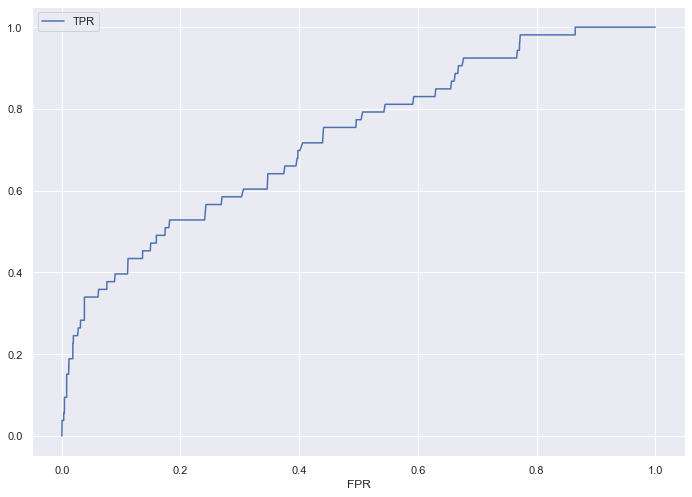

In [248]:
# import matplot lib 
import matplotlib.pyplot as plt

# create the plot
pd_2.plot.line(x='FPR', y=['TPR'])

# display the plot
%matplot plt

### Confusion Matrix

In [249]:
class_names=[1.0,0.0]
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[   6   14]
 [1026 6986]]


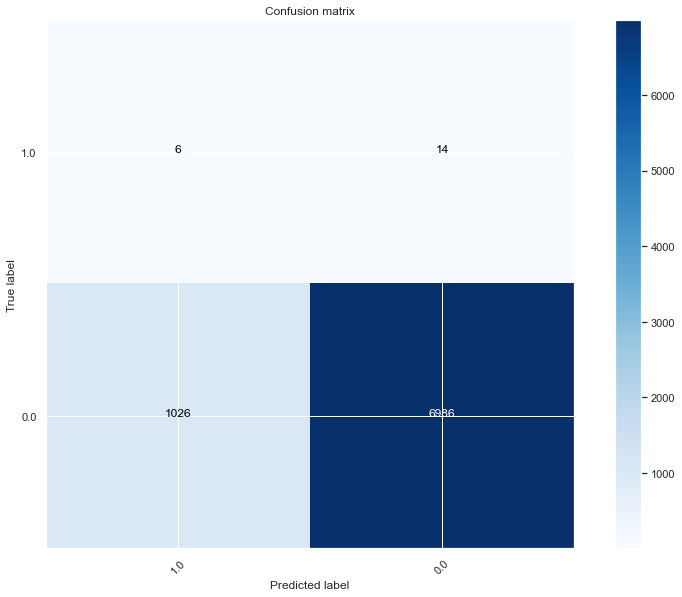

In [250]:
y_true = predictions_2.select("label")
y_true = y_true.toPandas()

y_pred = predictions_2.select("prediction")
y_pred = y_pred.toPandas()

cnf_matrix = confusion_matrix(y_true, y_pred,labels=class_names)
#cnf_matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')
plt.show()

In [ ]:
### Still we can improve the model in the recall and precision